In [64]:
# import required packages
import numpy as np

from  sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # For creating plots

**Question 1**: Load the dataset (Hotel_reservation.csv) for today's lab from LEARN using the function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) in numpy. The dataset comes from [this page](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset). View your dataset after loading and compare it to the contents of the CSV file. You may have to choose non-default values for some of the parameters of genfromtxt to get this dataset to load properly.

In [65]:
hotels = np.genfromtxt('Hotel Reservations.csv', delimiter=',', dtype='str', skip_header=True)
hotels

array([['INN00001', '2', '0', ..., '65', '0', 'Not_Canceled'],
       ['INN00002', '2', '0', ..., '106.68', '1', 'Not_Canceled'],
       ['INN00003', '1', '0', ..., '60', '0', 'Canceled'],
       ...,
       ['INN36273', '2', '0', ..., '98.39', '2', 'Not_Canceled'],
       ['INN36274', '2', '0', ..., '94.5', '0', 'Canceled'],
       ['INN36275', '2', '0', ..., '161.67', '0', 'Not_Canceled']],
      dtype='<U13')

**Question 2**: For the following questions, we will not be using the first column in the dataset. Drop that column from the dataset. Note that the last column in the dataset represents class labels.

In [66]:
hotels = hotels[:, 1:]
hotels

array([['2', '0', '1', ..., '65', '0', 'Not_Canceled'],
       ['2', '0', '2', ..., '106.68', '1', 'Not_Canceled'],
       ['1', '0', '2', ..., '60', '0', 'Canceled'],
       ...,
       ['2', '0', '2', ..., '98.39', '2', 'Not_Canceled'],
       ['2', '0', '0', ..., '94.5', '0', 'Canceled'],
       ['2', '0', '1', ..., '161.67', '0', 'Not_Canceled']], dtype='<U13')

**Question 3**: You may note that the 5th column in the dataset contains strings. Most ML models are not capable of handling such data, for instance, you can't do multiplication with string which is needed for linear regression. You need to change the string values to real numbers. Use ['OrdinalEncoder'](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to encode the strings with real numbers. You can read more about `Encoding` [here](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

In [44]:
# create an OrdinalEncoder and fit it to the 5th column in the dataset.
oec = OrdinalEncoder(categories='auto', dtype=float)
oec.fit(hotels[:, [4]])


OrdinalEncoder(dtype=<class 'float'>)

In [45]:
# unique values in the column found by OrdinalEncoder
oec.categories_


[array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
       dtype='<U13')]

In [47]:
# replace original data in the dataset with encoded values
hotels[:, 4] = oec.transform(hotels[:, [4]]).flatten()

**Question 4**: Repeat the process for other non-real columns in the dataset **except the last column**.

In [52]:
for i in [6, 11]:
    # create an OrdinalEncoder and fit it to the 5th column in the dataset.
    oec = OrdinalEncoder(categories='auto', dtype=float)
    oec.fit(hotels[:, [i]])

    # replace original data in the dataset with encoded values
    hotels[:, i] = oec.transform(hotels[:, [i]]).flatten()

**Question 5**: At this stage, all your columns except the last one should contain real values. Split the dataset into two variables containing features and class labels respectively. Change the dtype for features to `float`.

In [57]:
x = hotels[:, :-1].astype(float)
y = hotels[:, -1]

**Question 6**: Split the dataset into training and testing? Train a Support Vector Machine (SVM) classifier using the holdout method. Report your model’s performance.

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [62]:
clf = SVC()
clf.fit(x_train, y_train)
print('Training:', clf.score(x_train, y_train))
print('Testing:', clf.score(x_test, y_test))

Training: 0.7644383184011027
Testing: 0.7630599586492074


**Question 7**: [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) is another technique in scikit-learn for encoding features with non-real values. Use OneHotEncoder to encode the 4th column in the dataset obtained after 2nd question. For other columns having non-real values, use OrdinalEncoder. Split the dataset into training and testing? Train a Support Vector Machine (SVM) classifier using the holdout method. Report your model’s performance.

In [74]:
# create an OneHotEncoder and fit it to the 5th column in the dataset.
ohc = OneHotEncoder(categories='auto', dtype=float, sparse=False)
ohc.fit(hotels[:, [4]])

# replace original column in the dataset with encoded values
hotels_4 = ohc.transform(hotels[:, [4]]) # this will be an array with 4 columns
hotels = np.concatenate([hotels[:, :4], hotels_4, hotels[:, 5:]], axis=1)

In [76]:
for i in [9, 14]:
    # create an OrdinalEncoder and fit it to the 5th column in the dataset.
    oec = OrdinalEncoder(categories='auto', dtype=float)
    oec.fit(hotels[:, [i]])

    # replace original data in the dataset with encoded values
    hotels[:, i] = oec.transform(hotels[:, [i]]).flatten()

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [79]:
clf = SVC()
clf.fit(x_train, y_train)
print('Training:', clf.score(x_train, y_train))
print('Testing:', clf.score(x_test, y_test))

Training: 0.7650241212956582
Testing: 0.7594762232942798


**Question 8** Read the documentation about [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) in scikit-learn and download the california housing dataset. How many features does the dataset have? What does the target value look like? Split the dataset into training and testing?

In [30]:
# load the dataset
# Please review earlier questions from today's lab to find solutions for other parts of this question.
housing_data = fetch_california_housing()


In [33]:
housing_data.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [31]:
# Split the dataset into training testing
x_train, x_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target, test_size=0.2)


**Question 9**: Build a linear regression model using the training dataset. Evaluate the performance of your model on the training and testing dataset.
**Solution**: Refer documentation and examples on [this](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) page.
Also, see cell below. The object `lr` contains all information about the trained model.

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [26]:
print('Training data:', lr.score(x_train, y_train))
print('Testing data:', lr.score(x_test, y_test))


Training data: 0.6045131722835388
Testing data: 0.6039981907994376


**Question 10**: Compute the predicted values for the target variable based on the model trained in the previous question. Use the first 10 samples in the dataset and generate a visualization that shows the actual and predicted values for these 10 samples.

In [23]:
# compute predictions for samples in the testing dataset
y_pred = lr.predict(x_test)

0.6039981907994376

Text(0, 0.5, 'Actual/Predicted value of the target')

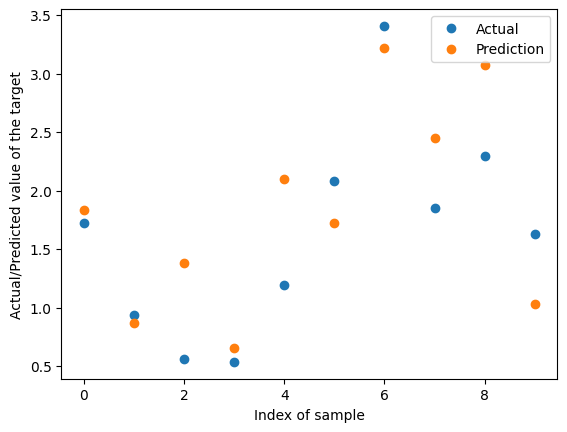

In [28]:
# scatter plot of actual and predicted values for the target variable for first 10 samples
plt.plot(y_test[:10], 'o', label='Actual')
plt.plot(y_pred[:10], 'o', label='Prediction')

# add the legend to reflect which point denote which quantity
plt.legend()
plt.xlabel('Index of sample') # label of x-axis
plt.ylabel('Actual/Predicted value of the target') # label of y-axis